### Data set \#1 Redlined Districts

In [66]:
import json, pandas as pd

In [67]:
with open('mappinginequality.json') as f:
    historic_data = json.load(f)

# type(historic_data) # confirmed it is a dict
historic_data.keys()

dict_keys(['type', 'features'])

In [68]:
# historic_data

{'type': 'FeatureCollection',   
 'features': [{'type': 'Feature',   
   'geometry': {'type': 'MultiPolygon', 
    'coordinates': [[[[-86.75678, 33.49754],    
       [-86.75653, 33.50176],   
       [-86.75724, 33.50179],   
       [-86.75813, 33.50088],   
       [-86.76032, 33.49846],   
       [-86.76046, 33.49818],   
       [-86.76065, 33.49731],   
       [-86.76146, 33.49581],   
       [-86.76208, 33.49529],   
       [-86.76246, 33.49489],   
       [-86.76246, 33.4945],    
       [-86.76184, 33.49402],   
       [-86.76122, 33.49402],   
       [-86.76113, 33.49371],   
       [-86.76194, 33.49264],   
       [-86.76336, 33.49172],   
       [-86.76479, 33.49089],   
       [-86.76588, 33.49057],   
       [-86.76664, 33.49006],   
       [-86.76735, 33.48931],   
       [-86.76897, 33.48839],   
       [-86.77111, 33.48697],   
... 
    'residential': True,    
    'commercial': False,    
    'industrial': False,    
    'fill': '#d9838d'}},    
  ...]}     
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

In [69]:
historic_data['type']

'FeatureCollection'

In [70]:
# historic_data['features']

[{'type': 'Feature',    
  'geometry': {'type': 'MultiPolygon',  
   'coordinates': [[[[-86.75678, 33.49754], 
      [-86.75653, 33.50176],    
      [-86.75724, 33.50179],    
      [-86.75813, 33.50088],    
      [-86.76032, 33.49846],    
      [-86.76046, 33.49818],    
      [-86.76065, 33.49731],    
      [-86.76146, 33.49581],    
      [-86.76208, 33.49529],    
      [-86.76246, 33.49489],    
      [-86.76246, 33.4945],   
      [-86.76184, 33.49402],    
      [-86.76122, 33.49402],    
      [-86.76113, 33.49371],    
      [-86.76194, 33.49264],    
      [-86.76336, 33.49172],    
      [-86.76479, 33.49089],    
      [-86.76588, 33.49057],    
      [-86.76664, 33.49006],    
      [-86.76735, 33.48931],    
      [-86.76897, 33.48839],    
      [-86.77111, 33.48697],    
      [-86.77168, 33.48617],    
...   
   'residential': True,     
   'commercial': False,   
   'industrial': False,   
   'fill': '#d9838d'}},   
 ...]   
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

So from this json file it is type FeatureCollection but all the data is stored in ['features']

In [71]:
# historic_data['features'][0]

{'type': 'Feature',     
 'geometry': {'type': 'MultiPolygon',   
  'coordinates': [[[[-86.75678, 33.49754],  
     [-86.75653, 33.50176],     
     [-86.75724, 33.50179],     
     [-86.75813, 33.50088],     
     [-86.76032, 33.49846],     
     [-86.76046, 33.49818],     
     [-86.76065, 33.49731],     
     [-86.76146, 33.49581],     
     [-86.76208, 33.49529],     
     [-86.76246, 33.49489],     
     [-86.76246, 33.4945],      
     [-86.76184, 33.49402],     
     [-86.76122, 33.49402],     
     [-86.76113, 33.49371],     
     [-86.76194, 33.49264],     
     [-86.76336, 33.49172],     
     [-86.76479, 33.49089],     
     [-86.76588, 33.49057],     
     [-86.76664, 33.49006],     
     [-86.76735, 33.48931],     
     [-86.76897, 33.48839],     
     [-86.77111, 33.48697],     
     [-86.77168, 33.48617],     
...     
  'label': 'A1',    
  'residential': True,  
  'commercial': False,  
  'industrial': False,  
  'fill': '#76a865'}}   
Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...

So this has solid geo data in ['coordinates'] and actual geo properties in ['properties']

In [72]:
for i in range(5):
    print(historic_data['features'][i]['properties'])

{'area_id': 244, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A1', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 193, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A2', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 206, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Best', 'grade': 'A', 'label': 'A3', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#76a865'}
{'area_id': 203, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Still Desirable', 'grade': 'B', 'label': 'B1', 'residential': True, 'commercial': False, 'industrial': False, 'fill': '#7cb5bd'}
{'area_id': 189, 'city': 'Birmingham', 'state': 'AL', 'city_survey': True, 'category': 'Still Desirable', 'grade': 'B', 'label': 'B10', 'residential': True, 'commerc

We can use ['properties']['city'] to get denver

In [73]:
denver_historic_data = []

for feature in historic_data['features']:
    if feature['properties']['city'] == 'Denver':
        denver_historic_data.append(feature)

denver_historic_data[:3]

[{'type': 'Feature',
  'geometry': {'type': 'MultiPolygon',
   'coordinates': [[[[-104.90814, 39.74754],
      [-104.91246, 39.74749],
      [-104.91252, 39.75105],
      [-104.91741, 39.75108],
      [-104.91737, 39.74848],
      [-104.92224, 39.7485],
      [-104.92222, 39.74817],
      [-104.92811, 39.74822],
      [-104.92923, 39.74823],
      [-104.92919, 39.74701],
      [-104.9271, 39.74701],
      [-104.9271, 39.74469],
      [-104.92908, 39.74473],
      [-104.93189, 39.74469],
      [-104.93197, 39.7433],
      [-104.92927, 39.74334],
      [-104.92833, 39.74339],
      [-104.92708, 39.7433],
      [-104.92706, 39.74199],
      [-104.92468, 39.74199],
      [-104.92462, 39.74082],
      [-104.92028, 39.74073],
      [-104.91509, 39.74077],
      [-104.9141, 39.74077],
      [-104.91407, 39.73853],
      [-104.91398, 39.72919],
      [-104.91288, 39.72921],
      [-104.9125, 39.72919],
      [-104.91259, 39.74092],
      [-104.90824, 39.74097],
      [-104.90814, 39.74754]]]]}

I was looking up the differences between JSON and GEOJSON and found a helpful resource. geopandas is apparently great at understanding GEOJSON geometry so lets try some EDA with it and see what we get

In [74]:
# pip install geopandas

In [75]:
import geopandas as gdp

denver_gdf = gdp.GeoDataFrame.from_features(denver_historic_data)
denver_gdf.head()

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
0,"MULTIPOLYGON (((-104.90814 39.74754, -104.9124...",6525,Denver,CO,True,Best,A,A1,True,False,False,#76a865
1,"MULTIPOLYGON (((-104.92221 39.73851, -104.9222...",6529,Denver,CO,True,Best,A,A2,True,False,False,#76a865
2,"MULTIPOLYGON (((-104.91281 39.72538, -104.9128...",6537,Denver,CO,True,Best,A,A3,True,False,False,#76a865
3,"MULTIPOLYGON (((-104.96016 39.72913, -104.9601...",6536,Denver,CO,True,Best,A,A4,True,False,False,#76a865
4,"MULTIPOLYGON (((-104.95956 39.72366, -104.9595...",6540,Denver,CO,True,Best,A,A5,True,False,False,#76a865


In [76]:
denver_gdf["city"].value_counts() #just to double check

city
Denver    56
Name: count, dtype: int64

In [77]:
denver_gdf["grade"].value_counts()

grade
C    20
D    16
B    12
A     6
Name: count, dtype: int64

crunching these numbers there are two rows with no grades, these will be discarded

In [78]:
denver_gdf.loc[denver_gdf["grade"] == "D"]

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
38,"MULTIPOLYGON (((-104.88487 39.74318, -104.8848...",6522,Denver,CO,True,Hazardous,D,D1,True,False,False,#d9838d
39,"MULTIPOLYGON (((-105.00536 39.76194, -105.0020...",6568,Denver,CO,True,Hazardous,D,D10,True,False,False,#d9838d
40,"MULTIPOLYGON (((-104.99513 39.76131, -104.9972...",6555,Denver,CO,True,Hazardous,D,D11,True,False,False,#d9838d
41,"MULTIPOLYGON (((-104.96475 39.76814, -104.9648...",6531,Denver,CO,True,Hazardous,D,D12,True,False,False,#d9838d
42,"MULTIPOLYGON (((-104.96472 39.7644, -104.96594...",6532,Denver,CO,True,Hazardous,D,D13,True,False,False,#d9838d
43,"MULTIPOLYGON (((-104.97321 39.79092, -104.9896...",6557,Denver,CO,True,Hazardous,D,D14,True,False,False,#d9838d
44,"MULTIPOLYGON (((-104.95454 39.78368, -104.9713...",6556,Denver,CO,True,Hazardous,D,D15,True,False,False,#d9838d
45,"MULTIPOLYGON (((-104.95454 39.78368, -104.9507...",6553,Denver,CO,True,Hazardous,D,D16,True,False,False,#d9838d
46,"MULTIPOLYGON (((-104.94065 39.71942, -104.9562...",6538,Denver,CO,True,Hazardous,D,D2,True,False,False,#d9838d
47,"MULTIPOLYGON (((-104.99823 39.67234, -104.9983...",6548,Denver,CO,True,Hazardous,D,D3,True,False,False,#d9838d


<Axes: title={'center': 'Count of HOLC Grades in Denver'}, xlabel='grade'>

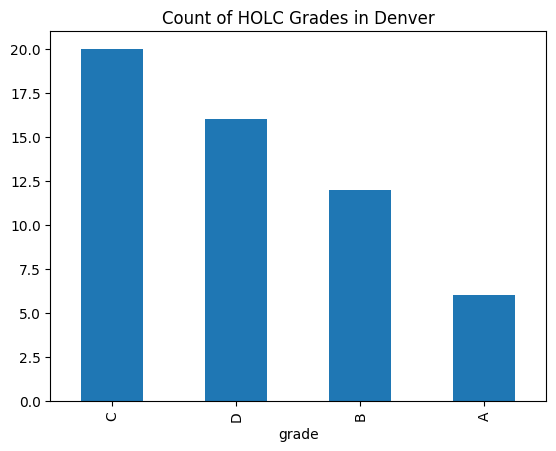

In [79]:
denver_gdf["grade"].value_counts().plot(kind="bar", title="Count of HOLC Grades in Denver")

<Axes: >

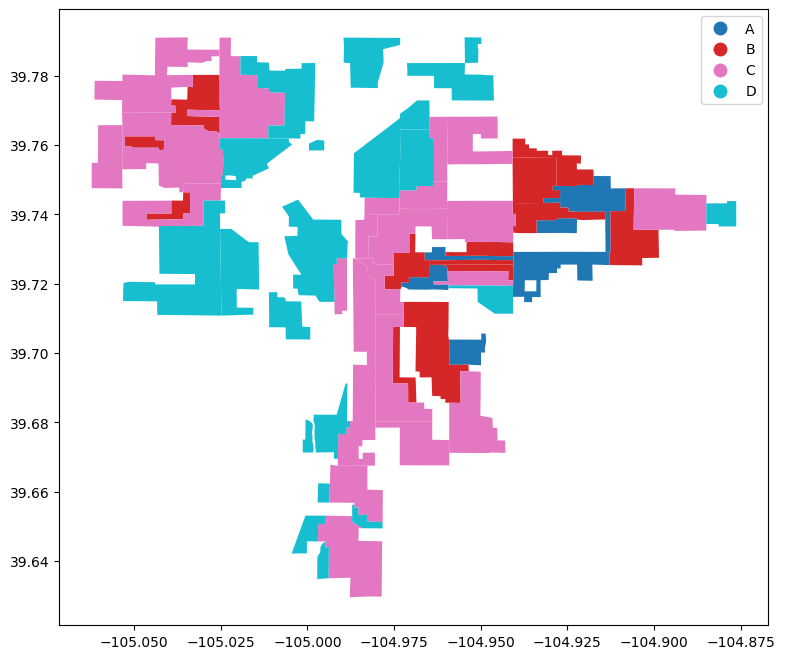

In [80]:
denver_gdf.plot(column="grade", legend=True, figsize=(10, 8))

This is super swag but I want to make this make sense to the average viewer so they can see this data plotted over a map of denver. I have looked into this a little bit because I know there are a million libraries to help plot real maps but I think the one I am specifically looking for is a library called contextily

Contextily looks like it is designed specifically to provide real world context for python geo maps

https://contextily.readthedocs.io/en/latest/intro_guide.html

This is the documentation I am following

"""     
Welcome to the taster guide for contextily, the package for contextual tiles in Python. In this notebook, we will show the basic functionality available in contextily, a package to work with web-tiles for background maps. To do that, we will use additional data to illustrate contextily can be integrated with other libraries such as geopandas and rasterio.   
"""

In [81]:
# %pip install contextily

Since I am going to be learning this part as we go I am pretty much going to document every few lines

starting with a very simple import block containing contextily and whatever else I find I need

In [82]:
import matplotlib.pyplot as plt
import contextily as cx

Next. Denver_gdf is a geopandas.geodataframe.GeoDataFrame object which means it has a few helpful methods and attributes we will need to check starting with crs and bounds.

crs stands for Coordinate Reference System which is essentially just teh time standard thing we have talked about earlier in this class but for coordinates. GeoJSON is usually EPSG:4326 (longitude, latitude in degrees[a modern global coordinate system that handles earth as an ellipsoid]) so we need to verify that this is the case and if it is not we will need to update the crs

In [83]:
type(denver_gdf)

geopandas.geodataframe.GeoDataFrame

In [84]:
print(denver_gdf.crs)

None


womp womp

In [85]:
denver_gdf = denver_gdf.set_crs('EPSG:4326')
print(denver_gdf.crs)

EPSG:4326


And the total bounds (another attribute) "total_bounds returns [minx, miny, maxx, maxy]"

Denver is centered around   
Latitude	39.742043   
Longitude	-104.991531

So I am hoping for something that roughly encompases that area within a few degrees

In [86]:
denver_gdf.total_bounds

array([-105.06225,   39.62952, -104.87626,   39.79111])

This looks good to me & means I dont have to reset it!

This is the part where things get a little more confusing. Apparently Contextily basemaps (which is what is used in the documentation) use EPSG 3857 which is "Web Mercator projection" widely used in online mapping platforms but is a flat coordinate representation (does not handel the earht as an ellipsoid).

So what we need to do is make a copy of the denver_gdf transforming the coordinates from ESPG 4326 to ESPG 3857

This is the step that lines up the contextily map with our districts map above

In [87]:
denver_gdf_3857 = denver_gdf.to_crs(epsg=3857)

From here it is just a matter of plotting the contextily map and our district plot from above. Looking at a quick resource from a google search

https://matplotlib.org/stable/users/explain/axes/axes_intro.html

The convention for plots is to use ax when assigning a matplotlib plot object and similarly for a contextily plot object we use cx. Just a fun fact!

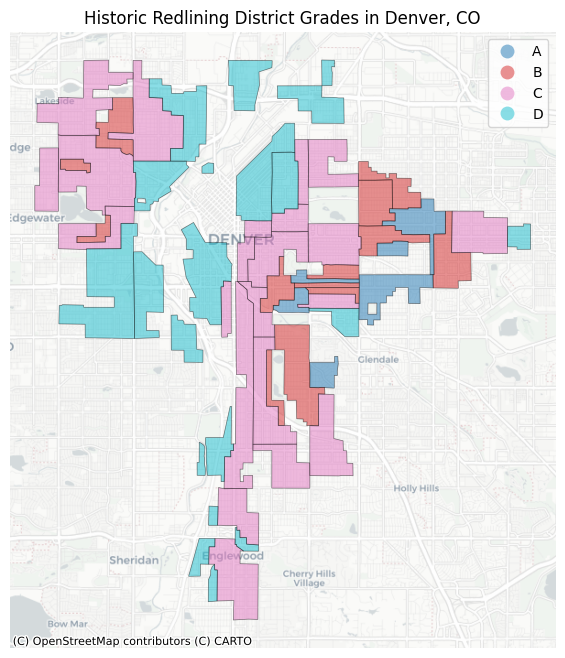

In [88]:
ax = denver_gdf_3857.plot(
    column="grade", 
    legend=True, 
    figsize=(8, 8), 
    alpha=0.5,
    edgecolor="black",
    linewidth=0.5
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.axis('off') # turned off the axis because it was just nonsense numbers in web mercator
plt.title("Historic Redlining District Grades in Denver, CO")
plt.show()

Now this is a small thing but I do care about the users experience in this so I looked up matplotlibs documentation on how to change colors and it looks like I can change this to a catigorical plot and use a matplotlib library to make a color map of teh categories to colors then use those colors to fill.

https://matplotlib.org/stable/gallery/color/named_colors.html

I will also be using this accessable red-orange-yellow-green color pallet from colorany.com

https://colorany.com/color-palettes/contrasting-green-yellow-orange-and-red-color-palettes/

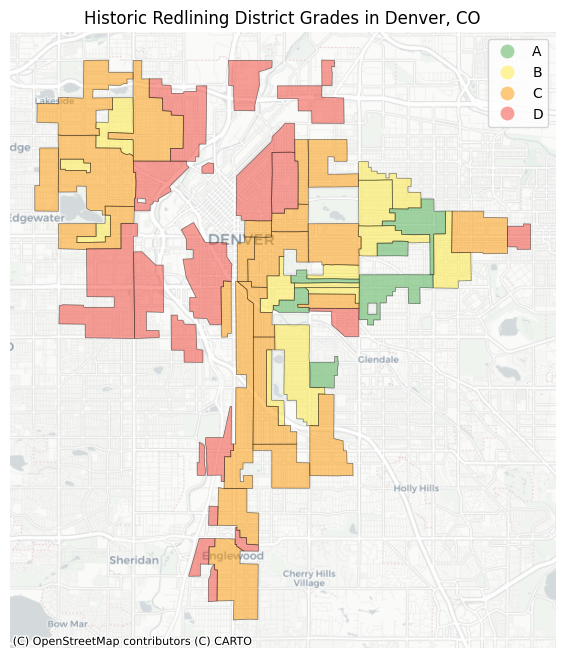

In [89]:
import matplotlib.colors as mcolors

grade_categories = ["A", "B", "C", "D"]
grade_colors = ["#4CAF50", "#FFEB3B", "#FF9800", "#F44336"]

color_map = mcolors.ListedColormap(grade_colors)


ax = denver_gdf_3857.plot(
    column="grade", 
    cmap=color_map,
    categorical=True,
    categories=grade_categories,
    legend=True, 
    figsize=(8, 8), 
    alpha=0.5,
    edgecolor="black",
    linewidth=0.5
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.axis('off') # turned off the axis because it was just nonsense numbers in web mercator
plt.title("Historic Redlining District Grades in Denver, CO")
plt.show()

OOOOOOOWEEEEEEEE THis is starting to come together. Side note: I love the EDA part of this because I get to be informal and slip conversational comments into these sections lowk similar to what I do for my homework assignments. I will lock in for the Actual final deliverable though. It will be so serious and important.

But alas I have spent way too much time on this one graph so lets move onto the next part of this project with data set number 2!

-------
So this is really funny, In class we just did a geopandas example using .explore() I had initially gotten an error about trust permissions I could not get around so I dropped it and thats what led me to contextily. Sitting in class realizing I literally could not do what we were talking about unless I figured out how to trust my noetbook I locked in

The error was I needed to trust my notebook but VS Code has no good built in way to do that for .ipynb files (especially ssince VS Code trust and jupyter notebook trust is different) after a few failed attempts in the command pallett and preference settings I figured out how to open the file in the text editor and manually add "trusted":true to the meta data which would trust the notebook. 

This is not the best fix since if you restart the notebook it still acts a fool but this is a good work around so I will do a little geopandas exploration.

In [90]:
denver_gdf.explore()

This makes the fan SPIN in my laptop but this is WAY easier and intrinsically interactive so while I will leave my previous work alone since it took me a long time to do it I am going to move forward and re-work teh rest of my project to just use this now that my notebook is mostly trusted.

In [91]:
grade_categories = ["A", "B", "C", "D"]
grade_colors = ["#4CAF50", "#FFEB3B", "#FF9800", "#F44336"]

color_map = mcolors.ListedColormap(grade_colors)

m = denver_gdf.to_crs(4326).explore(
    column="grade",
    categorical=True,       # treat as categories (not numeric)
    categories=grade_categories,        # ensure A/B/C/D map to your color order
    cmap=color_map,
    legend=True,
    tiles="CartoDB positron",
    style_kwds={"fillOpacity": 0.6, "weight": 0.6},
    tooltip=["grade","category","label"],  # tweak to match your columns

    zoom_start=11.4,   # where the map starts
    min_zoom=11.4,     # can’t zoom OUT beyond this
    max_bounds=True,
)
m


In [92]:
denver_ll = denver_gdf.to_crs(4326)
minx, miny, maxx, maxy = denver_ll.total_bounds

m = denver_ll.explore(
    column="grade",
    categorical=True,
    categories=["A","B","C","D"],
    cmap=["#4CAF50", "#FFEB3B", "#FF9800", "#F44336"],
    legend=True,
    tiles="CartoDB positron",
    style_kwds={"fillOpacity": 0.6, "weight": 0.6},

    zoom_start=11,   # where the map starts
    min_zoom=11,     # can’t zoom OUT beyond this
)

# fit view tightly to the data with a tiny buffer
pad = 0.01  # degrees ~ ~1km-ish
bounds = [[miny - pad, minx - pad], [maxy + pad, maxx + pad]]
m.fit_bounds(bounds)
m.options["maxBounds"] = bounds   # can't pan past these

m


------

### Data set \#2 US Census Data

Funnily enough I have to start this section off by explaining- When thinking about this part of the project I specifically wanted to mesh current Socioeconomic & housing data with teh historic redline data to see long term effects of redlining.

I knew something existed that was a US survey of general economic feelings in the US which I thought was a part of the census but as it turns out we are looking for 'The American Community Survey' both come from the Census Bureau but the actual Census itself is a "'Snapshot' taken every 10 years to distribute political power. The American Community Survey is a continuous 'moving video,' capturing the detailed social and economic portrait of the nation year after year." (govfacts.org)

https://govfacts.org/federal/commerce/census/the-census-vs-the-american-community-survey/

So what the American Community Survey (ACS) is, is a long form survey designed to capture the social, economic, housing, and demographic data from year to year.

Exploring the American Community Survey website they have a data tab and in that data tab they have a whole section for their API useage. We will be using their provided API because otherwise we would have to download and deal with a huge data load on my local machine and because this project requires we use at least two different structural types. 

https://www.census.gov/programs-surveys/acs/data/data-via-api.html

In order to work with the ACS API we need to request an API key, this creqtes a unique challenge for us since I am posting this whole project on github and it is generall unwise to post a unique API key publicly. So I will make a .env file to store my API Key then throw the .env file into a .gitignore

Now to use the API Key I will import load_dotenv and os to load the api key variable then store it as a local useable variable 

https://mikekipruto.substack.com/p/how-to-store-api-keys-securely-in

In [93]:
# %pip install python-dotenv

In [94]:
import os
from dotenv import load_dotenv
load_dotenv()

api_key = os.getenv("API_KEY")

Theoretically this should work but since I cant print or show the API key we will have to move on to utalizing it

"""     
To create an API call, you must enter a specific URL into the address bar of a web browser. The call will vary depending on the following factors:

Year of data release

Dataset (ACS 1-year or 5-year) 

Table ID

Geography level    

Example Call: api.census.gov/data/2024/acs/acs1?get=NAME,group(B01001)&for=us:1&key=YOUR_KEY_GOES_HERE

2024 ACS Detailed Tables Variables [ html | xml | json ]

ACS Technical Documentation

Examples and Supported Geography    
"""

In [95]:
import requests

In [96]:
# need to figure out which request I want to make

In [97]:
class CensusAPIrequester:
    def __init__(self, year=2022):
        self.year = year
        self.base_url = f"https://api.census.gov/data/{self.year}/acs/acs5"

    def get_api_groups(self):
        request = requests.get(self.base_url + "/groups.json")
        census_groups = request.json()
        return census_groups
    
    def get_api_group(self, group_code):
        request = requests.get(self.base_url + f"/groups/{group_code}.json")
        group = request.json()
        return group
    
    def get_group_variable(self, group_code, variable_code):
        variable = self.get_api_group(group_code)["variables"][variable_code]
        return variable
    
    # Above code is more for the exploratory side of things
    def get_data(self, variables, state="08", county="031", api_key=api_key):
        var_string = ",".join(variables)
        url = f"{self.base_url}?get={var_string}&for=tract:*&in=state:{state}+county:{county}&key={api_key}"
        response = requests.get(url)
        data = response.json()
        df = pd.DataFrame(data[1:], columns=data[0])
        return df


In [98]:
CensusObject = CensusAPIrequester(2023) #2024 data not out yet

In [99]:
#CensusObject.get_api_groups()
# I found that there were group codes that started with B19013 for specific ethnic groups
# But when I tried to look them up with an endpoint and it returned different groups?
# But at the same time the endpoint groups look more helpful and broad

# Group code B19013... is for "Median Household Income in the Past 12 Months"
# Variable code B19013_001E is specifically for Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)

#CensusObject.get_api_group("B19013")
CensusObject.get_group_variable("B19013","B19013_001E")


{'label': 'Estimate!!Median household income in the past 12 months (in 2023 inflation-adjusted dollars)',
 'concept': 'Median Household Income in the Past 12 Months (in 2023 Inflation-Adjusted Dollars)',
 'predicateType': 'int',
 'group': 'B19013',
 'limit': 0,
 'predicateOnly': True,
 'universe': 'Households'}

- school ratings
- crime statistics

In [100]:
census_data = CensusObject.get_data(variables=["B19013_001E"])
census_data = census_data.rename(columns={"B19013_001E":"median_income"})
census_data.head()

,median_income,state,county,tract
0,158906,08,031,000102
1,92237,08,031,000201
2,92621,08,031,000202
3,132875,08,031,000301
4,127554,08,031,000302


------------
## Dataset 3

Topologically Integrated Geographic Encoding and Referencing
Also from the US Census

In [101]:
tiger_url = "https://www2.census.gov/geo/tiger/TIGER2023/TRACT/tl_2023_08_tract.zip"
tracts = gdp.read_file(tiger_url)

display(tracts.head())

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,08,041,002300,08041002300,1400000US08041002300,23,Census Tract 23,G5020,S,3129892,0,+38.8273607,-104.8263328,"POLYGON ((-104.83615 38.82299, -104.83598 38.8..."
1,08,041,006600,08041006600,1400000US08041006600,66,Census Tract 66,G5020,S,2516901,91797,+38.8687188,-104.8744389,"POLYGON ((-104.88195 38.8566, -104.8819 38.856..."
2,08,041,006100,08041006100,1400000US08041006100,61,Census Tract 61,G5020,S,1355660,0,+38.8327720,-104.7524816,"POLYGON ((-104.75752 38.83876, -104.75751 38.8..."
3,08,041,006200,08041006200,1400000US08041006200,62,Census Tract 62,G5020,S,3609651,0,+38.8323139,-104.7346290,"POLYGON ((-104.74872 38.8261, -104.74869 38.82..."
4,08,035,014300,08035014300,1400000US08035014300,143,Census Tract 143,G5020,S,492002471,1693504,+39.2547440,-105.1569731,"POLYGON ((-105.32922 39.12969, -105.32915 39.1..."


In [102]:
tracts = tracts.loc[tracts["COUNTYFP"] == "031"].copy() # 031 is Denver County

display(tracts[["GEOID","NAME","ALAND","AWATER"]].head())

,GEOID,NAME,ALAND,AWATER
212,08031002101,21.01,880925,0
271,08031004404,44.04,1304208,0
272,08031004403,44.03,1465389,0
300,08031003701,37.01,1873267,120383
301,08031003702,37.02,706200,0


In [103]:
tracts.crs   # EPSG:4269 (NAD83) (North American Datum 1983)

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [104]:
census_data_to_merge = census_data.copy()

census_data_to_merge["GEOID"] = census_data_to_merge["state"] + census_data_to_merge["county"] + census_data_to_merge["tract"]
census_data_to_merge.head()

,median_income,state,county,tract,GEOID
0,158906,08,031,000102,08031000102
1,92237,08,031,000201,08031000201
2,92621,08,031,000202,08031000202
3,132875,08,031,000301,08031000301
4,127554,08,031,000302,08031000302


In [105]:
census_merged = tracts.merge(census_data_to_merge[["GEOID","median_income"]], on="GEOID", how="left")

census_merged["median_income"] = pd.to_numeric(census_merged["median_income"]) #was freaking out since it auto cast to string

print(len(tracts), len(census_data_to_merge), len(census_merged)) #should all be the same


178 178 178


In [106]:
census_merged_3875 = census_merged.to_crs(3857)  # from 4269 to 3857 (in order to map)

min_income = census_merged_3875["median_income"].min()
print(min_income)
# The min value was listed as -666666666 which actually reminds me I need to check this data for outliers
max_income = census_merged_3875["median_income"].max()
print(max_income)

-666666666
250001


<Axes: >

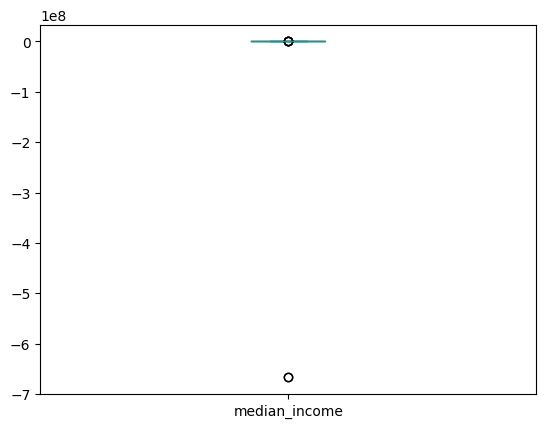

In [107]:
census_merged_3875["median_income"].plot(
    kind="box"
)

This is good since this tells us that it appears that the one huge outlier is heavily affecting our data

In [108]:
census_merged_3875 = census_merged_3875.loc[census_merged_3875["median_income"] >= 0]

<Axes: >

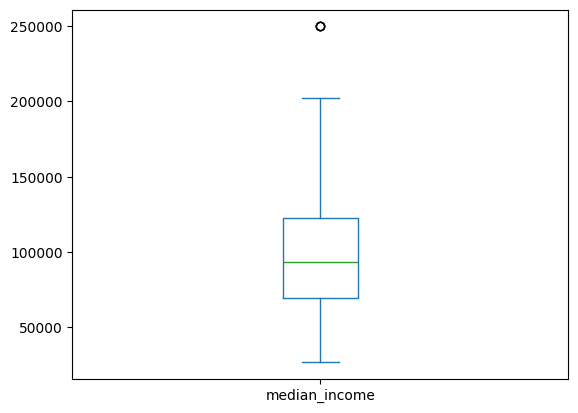

In [109]:
census_merged_3875["median_income"].plot(
    kind="box"
)

There is still one outlier at $250,000 but I'm gonna leave it since I think it better represents the rich districts of denver

In [110]:
min_income = census_merged_3875["median_income"].min()
print(min_income)
# The min value was listed as -666666666 which actually reminds me I need to check this data for outliers
max_income = census_merged_3875["median_income"].max()
print(max_income)

26462
250001


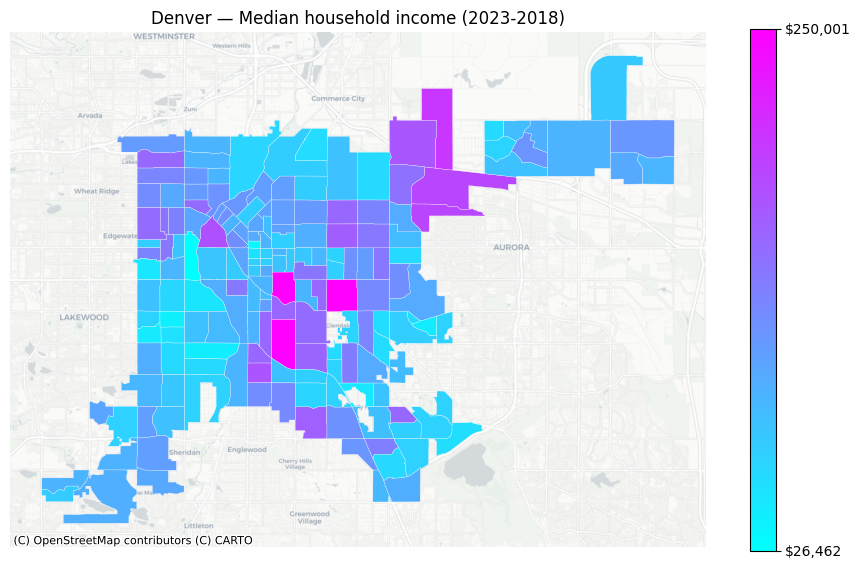

In [111]:
fig, ax = plt.subplots(figsize=(9,9))
census_merged_3875.plot(column="median_income",
       cmap="cool", 
       legend=True,
       legend_kwds={
              'ticks': [min_income, max_income], # Set ticks to only min and max
              'format': '${x:,.0f}', # format as currency
              'shrink': 0.6
       },
       linewidth=0.2,
       edgecolor="white",
       ax=ax)

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=12)
ax.set_title("Denver — Median household income (2023-2018)")
ax.set_axis_off()
plt.tight_layout()
plt.show()

-------------

## Putting it all together

In [112]:
holc = denver_gdf.to_crs(4326)
tracts = census_merged.to_crs(4326)

In [113]:
holc.head()

,geometry,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
0,"MULTIPOLYGON (((-104.90814 39.74754, -104.9124...",6525,Denver,CO,True,Best,A,A1,True,False,False,#76a865
1,"MULTIPOLYGON (((-104.92221 39.73851, -104.9222...",6529,Denver,CO,True,Best,A,A2,True,False,False,#76a865
2,"MULTIPOLYGON (((-104.91281 39.72538, -104.9128...",6537,Denver,CO,True,Best,A,A3,True,False,False,#76a865
3,"MULTIPOLYGON (((-104.96016 39.72913, -104.9601...",6536,Denver,CO,True,Best,A,A4,True,False,False,#76a865
4,"MULTIPOLYGON (((-104.95956 39.72366, -104.9595...",6540,Denver,CO,True,Best,A,A5,True,False,False,#76a865


In [114]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,median_income
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-105.00019 39.72412, -105.00016 39.7...",143581
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-104.90346 39.73899, -104.90346 39.7...",58204
2,08,031,004403,08031004403,1400000US08031004403,44.03,Census Tract 44.03,G5020,S,1465389,0,+39.7443925,-104.8948130,"POLYGON ((-104.90346 39.74561, -104.90346 39.7...",85336
3,08,031,003701,08031003701,1400000US08031003701,37.01,Census Tract 37.01,G5020,S,1873267,120383,+39.7444161,-104.9509827,"POLYGON ((-104.95979 39.7452, -104.95978 39.74...",96746
4,08,031,003702,08031003702,1400000US08031003702,37.02,Census Tract 37.02,G5020,S,706200,0,+39.7365218,-104.9543646,"POLYGON ((-104.95979 39.73504, -104.95979 39.7...",76028


La Piece de Resistance for this project is going to be a spatial merge from the old holc data and the 2023 Census data

How spatial joins work is they join two geodatasets (similar to normal joins) but instead of joining on a common trait spatial joins use a predicate to find the relation between datasets (touch, intersect, etc)

In [115]:
joined = gdp.sjoin(
    tracts, #left
    holc[["grade", "geometry"]], #right. Only add grade and geomotry to tracts data
    how="inner",
    predicate="intersects"
)
joined.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,median_income,index_right,grade
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-105.00019 39.72412, -105.00016 39.7...",143581,19,C
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-105.00019 39.72412, -105.00016 39.7...",143581,54,None
0,08,031,002101,08031002101,1400000US08031002101,21.01,Census Tract 21.01,G5020,S,880925,0,+39.7220354,-104.9938290,"POLYGON ((-105.00019 39.72412, -105.00016 39.7...",143581,50,D
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-104.90346 39.73899, -104.90346 39.7...",58204,12,B
1,08,031,004404,08031004404,1400000US08031004404,44.04,Census Tract 44.04,G5020,S,1304208,0,+39.7365094,-104.8940558,"POLYGON ((-104.90346 39.73899, -104.90346 39.7...",58204,38,D


In [116]:
joined["median_income"] = pd.to_numeric(joined["median_income"]) #was freaking out since it auto cast to string

In [117]:
joined["grade"].value_counts()


grade
C    128
D     72
B     59
A     23
Name: count, dtype: int64

In [118]:
cols = ["median_income"]  # adapt to your actual column names

summary = (
    joined
    .groupby("grade")[cols]
    .mean()   # could also use .mean()
    .sort_index()
)

summary


,median_income
grade,
A,139109.521739
B,142263.983051
C,110543.976562
D,94412.694444


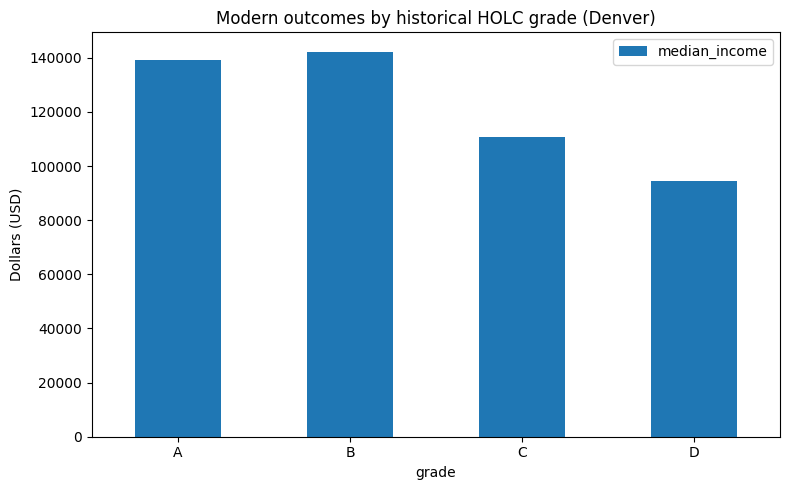

In [119]:
import matplotlib.pyplot as plt

ax = summary.plot(kind="bar", figsize=(8,5), rot=0)
ax.set_title("Modern outcomes by historical HOLC grade (Denver)")
ax.set_ylabel("Dollars (USD)")
plt.tight_layout()
plt.show()
